In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

In [ ]:
data  = requests.get(url).text

In [ ]:
soup = BeautifulSoup(data, 'html5lib')

In [ ]:
netflix = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

In [ ]:
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all('td')
    date = col[0].text
    open_ = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    new_row = pd.DataFrame({"Date": [date], "Open": [open_], "High": [high], "Low": [low], "Close": [close], "Adj Close": [adj_close], "Volume": [volume]})
    netflix= pd.concat([netflix, new_row], ignore_index=True)

In [ ]:
netflix.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


In [ ]:
netflix['Date']=pd.to_datetime(netflix['Date'])
netflix['Open'] = pd.to_numeric(netflix['Open'])
netflix['Close'] = pd.to_numeric(netflix['Close'])
netflix['High'] = pd.to_numeric(netflix['High'])
netflix['Low'] = pd.to_numeric(netflix['Low'])
netflix['Low'] = pd.to_numeric(netflix['Low'])
netflix['Adj Close'] = pd.to_numeric(netflix['Adj Close'])

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       70 non-null     datetime64[ns]
 1   Open       70 non-null     float64       
 2   High       70 non-null     float64       
 3   Low        70 non-null     float64       
 4   Close      70 non-null     float64       
 5   Volume     70 non-null     object        
 6   Adj Close  70 non-null     float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 4.0+ KB


In [ ]:
print(f'Dataframe contain stock prices between {netflix.Date.min()} {netflix.Date.max()}')
print(f'Total days={(netflix.Date.max()-netflix.Date.min()).days} days')

Dataframe contain stock prices between 2015-09-01 00:00:00 2021-06-01 00:00:00
Total days=2100 days


In [ ]:
netflix.describe()

,Date,Open,High,Low,Close,Adj Close
count,70,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2018-07-17 01:42:51.428571392,280.746000,307.922286,260.706714,286.039571,286.039571
min,2015-09-01 00:00:00,90.410000,97.480000,79.950000,90.030000,90.030000
25%,2017-02-08 00:00:00,141.610000,146.535000,138.360000,143.550000,143.550000
50%,2018-07-16 12:00:00,292.345000,330.315000,264.110000,294.550000,294.550000
75%,2019-12-24 06:00:00,373.875000,393.377500,342.420000,373.232500,373.232500
max,2021-06-01 00:00:00,545.570000,593.290000,518.280000,540.730000,540.730000
std,NaN,145.711699,158.539029,136.575328,146.445067,146.445067


In [ ]:
import matplotlib.pyplot as plt

<Axes: >

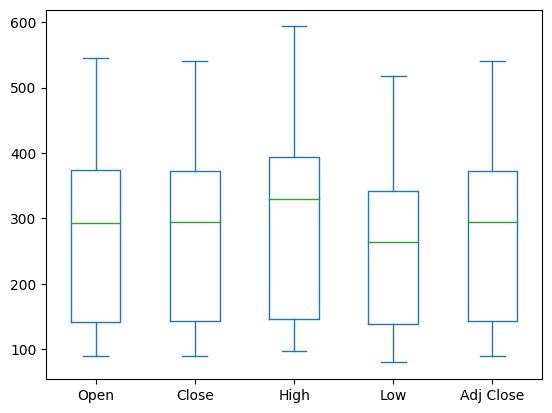

In [ ]:
netflix[['Open', 'Close', 'High', 'Low', 'Adj Close']].plot(kind='box')

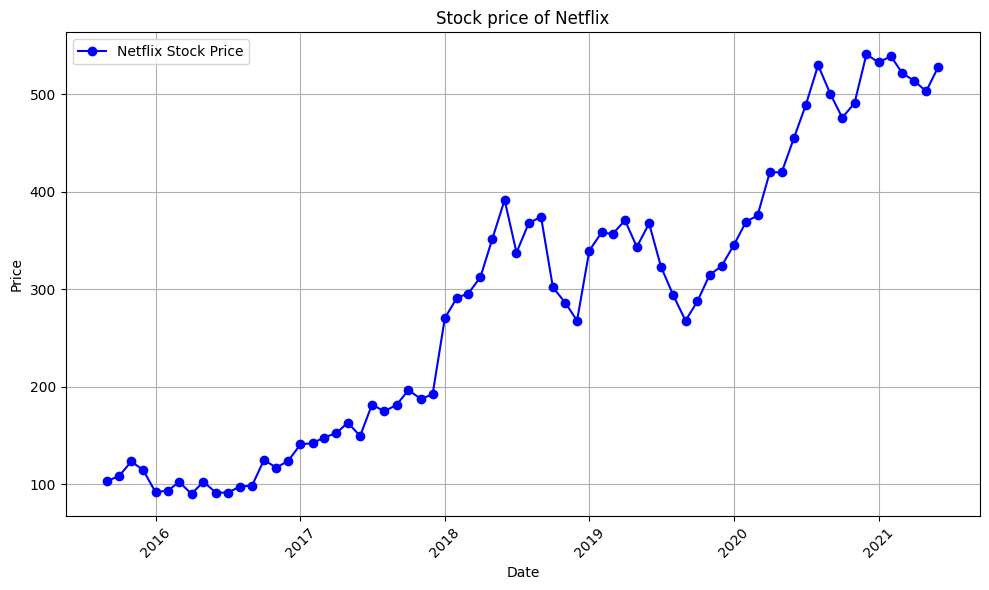

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(netflix['Date'], netflix['Close'], marker='o', linestyle='-', color='b', label='Netflix Stock Price')
plt.title('Stock price of Netflix')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


In [127]:
x=np.array(netflix.index).reshape(-1,1)
y=netflix['Close']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [128]:
scaler=StandardScaler().fit(x_train)

In [129]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [130]:
y_pred = model.predict(x_test)


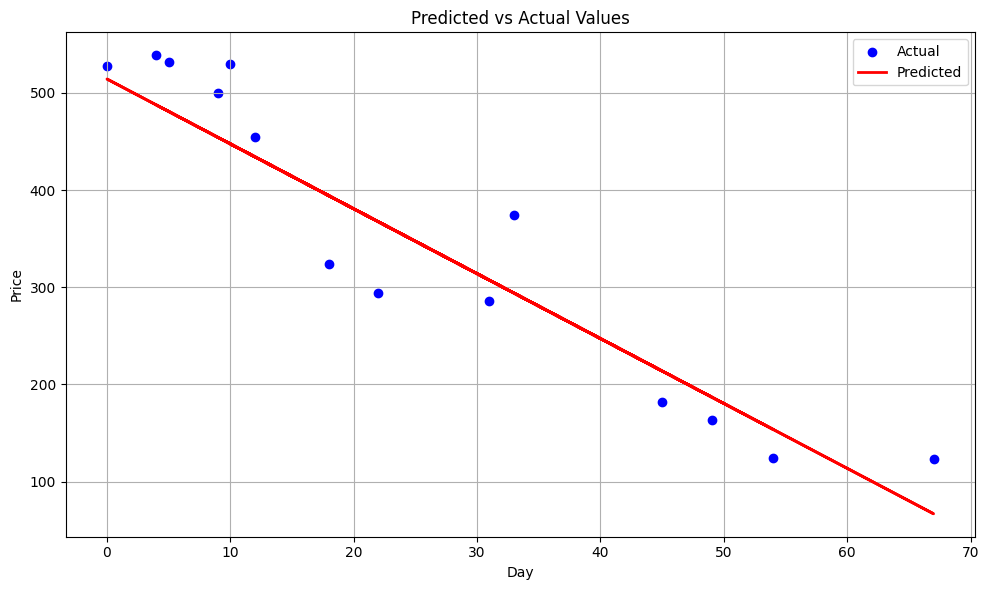

In [131]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test, y_test, marker='o', color='b', label='Actual')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Predicted vs Actual Values')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [134]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 2692.705581444871
Mean Absolute Error (MAE): 46.66063858924175
Root Mean Squared Error (RMSE): 51.891286180291104
